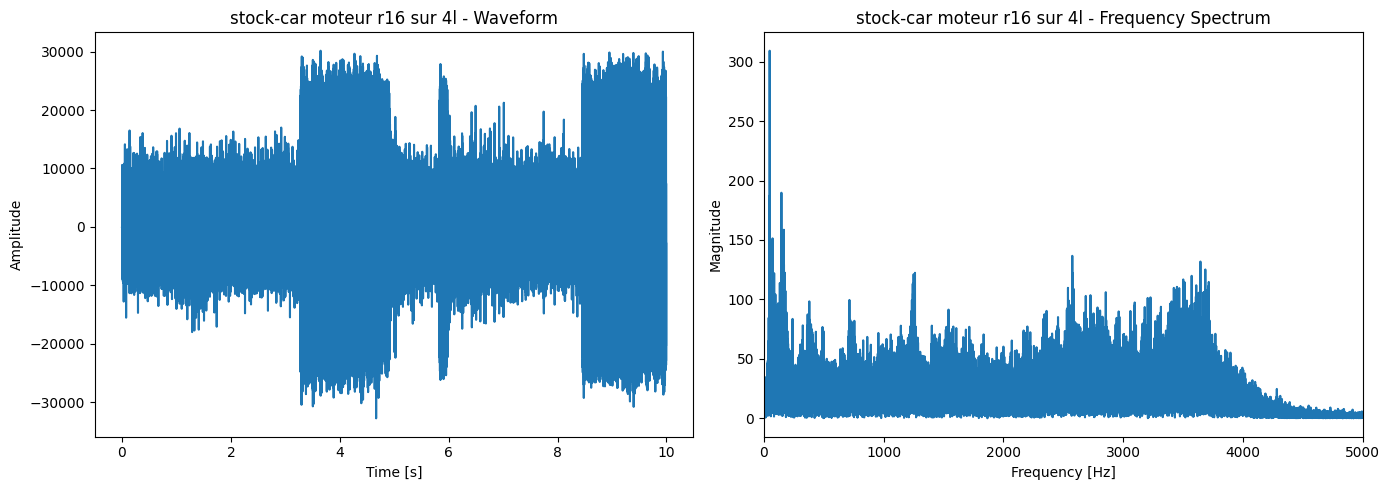

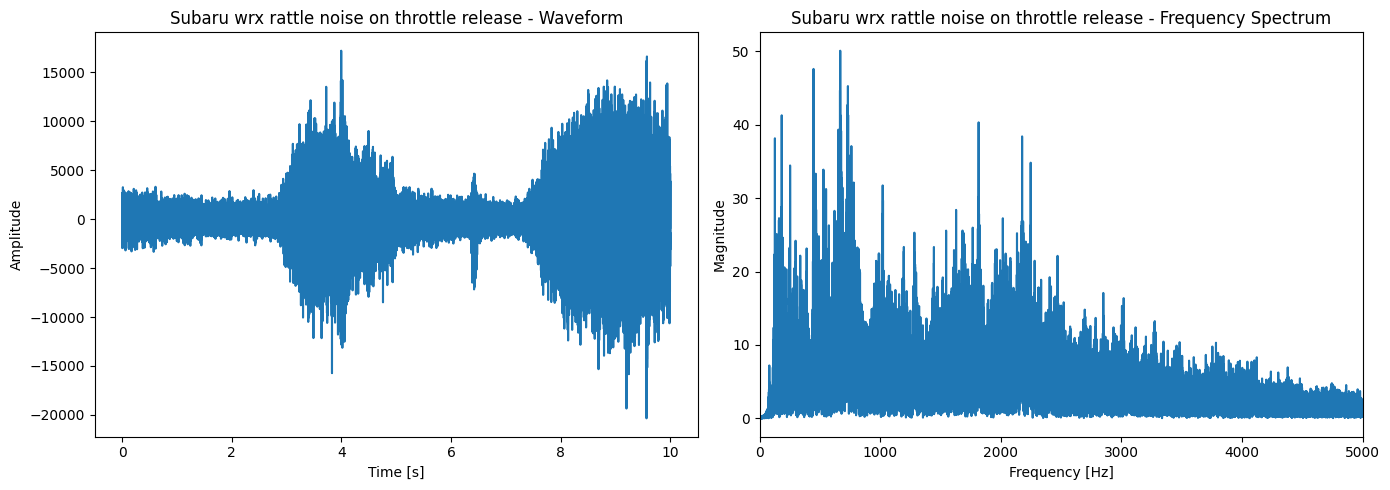

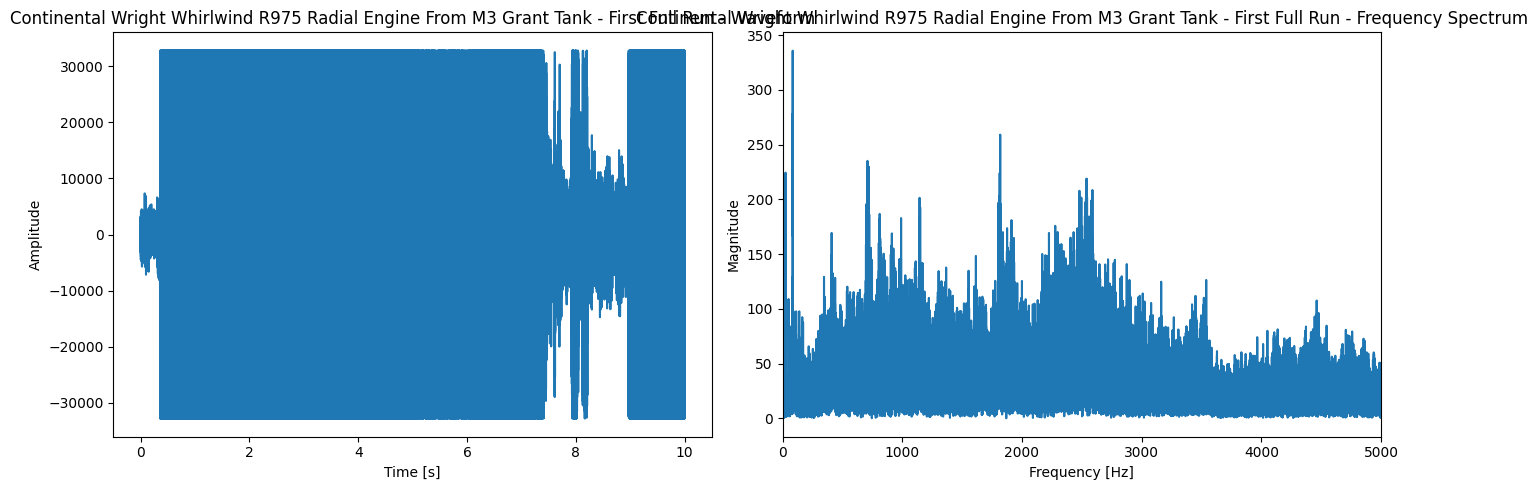

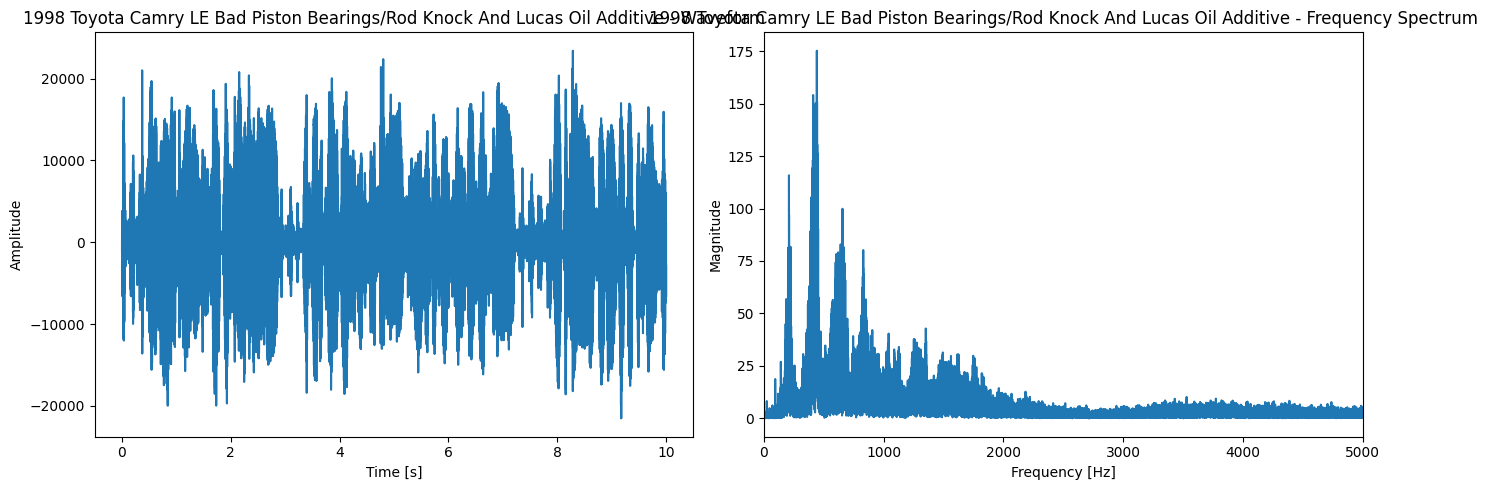

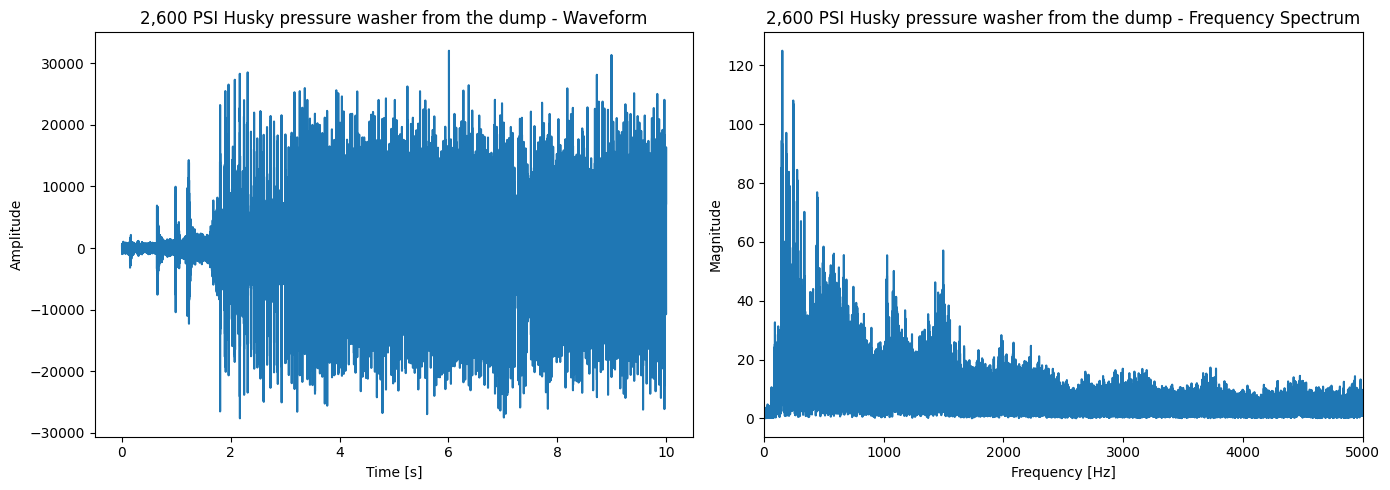

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import os
import random

# --- Paths ---
wav_folder = "Download/engine_downloads"
metadata_path = "Download/engine_metadata_structured.csv"

# --- Load metadata ---
metadata = pd.read_csv(metadata_path)

# --- Pick 5 random files ---
all_files = metadata['filename'].tolist()
sample_files = random.sample(all_files, 5)

for filename in sample_files:
    file_path = os.path.join(wav_folder, filename)
    
    # --- Load WAV ---
    sample_rate, data = wavfile.read(file_path)
    if len(data.shape) > 1:
        data = data[:, 0]  # take first channel if stereo
    
    time = np.arange(len(data)) / sample_rate
    
    # --- FFT ---
    n = len(data)
    fft_vals = np.fft.fft(data)
    fft_freqs = np.fft.fftfreq(n, 1/sample_rate)
    
    positive_freqs = fft_freqs[:n//2]
    positive_vals = np.abs(fft_vals[:n//2]) / n  # normalized
    
    # --- Get title ---
    title = metadata.loc[metadata['filename'] == filename, 'title'].values[0]
    
    # --- Plot ---
    plt.figure(figsize=(14, 5))
    
    # Waveform
    plt.subplot(1, 2, 1)
    plt.plot(time, data)
    plt.title(f"{title} - Waveform")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # FFT Spectrum
    plt.subplot(1, 2, 2)
    plt.plot(positive_freqs, positive_vals)
    plt.title(f"{title} - Frequency Spectrum")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.xlim(0, 5000)  # adjust based on engine frequencies
    
    plt.tight_layout()
    plt.show()


In [13]:
metadata.head()

,filename,title,description,brand,model,engine_type,vehicle_type,fuel_type,engine_state,turbo_supercharged
0,-2PDE7hUArE_30_40.wav,JDM Mitsubishi 4D56-T Auto Diesel Used Engine,We don't just say that! We really start up the...,Mitsubishi,4D56-T,4D56-T,JDM,diesel,running,yes
1,-75IwDlkzDQ_30_40.wav,volkswagen engine starting,volkswagen engine starting for first time in 5...,Volkswagen,NaN,NaN,NaN,gasoline,starting,no
2,-7J4109yM7w_30_40.wav,40-80 Minneapolis pulling 25HP N&S Steam Engine,Just playing with the 40-80 Minneapolis at Dal...,Minneapolis,40-80,Steam Engine,Tractor,Coal/Wood (for steam engine),pulling,no
3,-DNkAalo7og_30_40.wav,"Turbine Jet Engine 50,000 RPM Deutz T-216 100H...",1960's Deutz T-216 Turbine Engine! Runs on Die...,Deutz,T-216,Turbine Jet Engine,Industrial/Aerospace,Diesel,running,no
4,-GDC7PuqdOM_30_40.wav,First Start of Leyland Engine 4/98,I have renovate a Leyland 4/98 engine.\r\nAnd ...,Leyland,NaN,4/98,NaN,diesel,running,no


In [30]:
for col in metadata.columns:
    print(col)
    print(metadata[col].value_counts())

filename
filename
-2PDE7hUArE_30_40.wav      1
OuPNy_2AZ48_430_440.wav    1
PEkR2BLU1so_0_10.wav       1
POCCjcRSQJ4_0_10.wav       1
P_o8okkk3RM_50_60.wav      1
                          ..
7kIhJzeWnJE_110_120.wav    1
81vJ4-5ToUg_30_40.wav      1
8KpcCG4cuow_30_40.wav      1
8WfOH_ej_RU_30_40.wav      1
xcgW4BBreqI_30_40.wav      1
Name: count, Length: 151, dtype: int64
title
title
JDM Mitsubishi 4D56-T Auto Diesel Used Engine                                                         1
1979 Mercedes-Benz 240D parts car - old start, cold start - first start in 13 years (long version)    1
55 chevy cummins-killer burnout                                                                       1
Starting of the pulse engine                                                                          1
golf cart 24HP V-TWIN CONVERSION FIRE UP                                                              1
                                                                                            

Found 6 engines of type V6


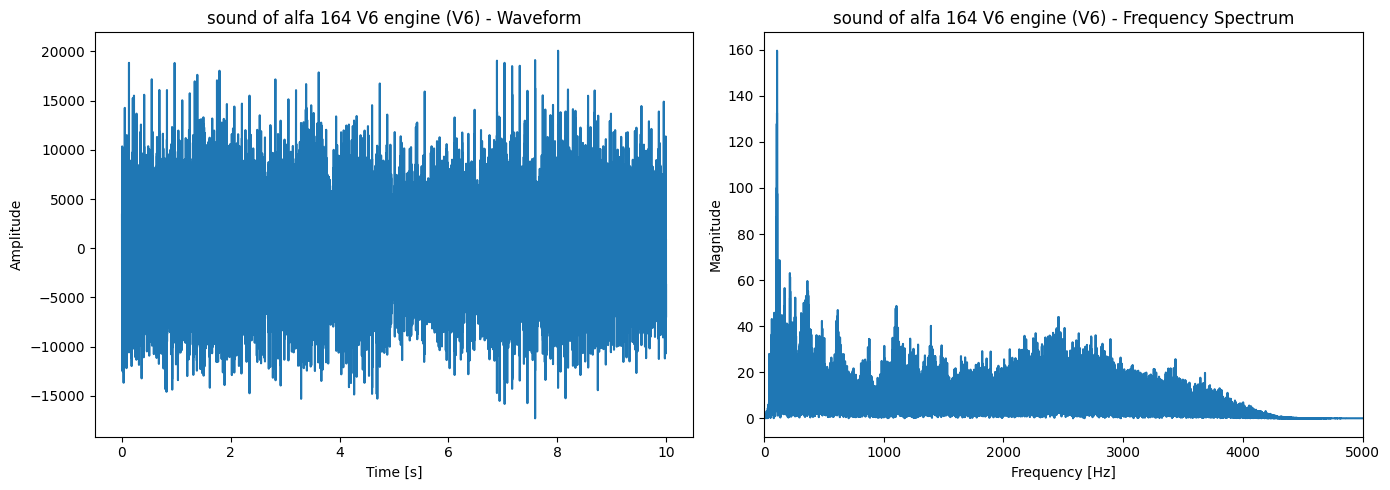

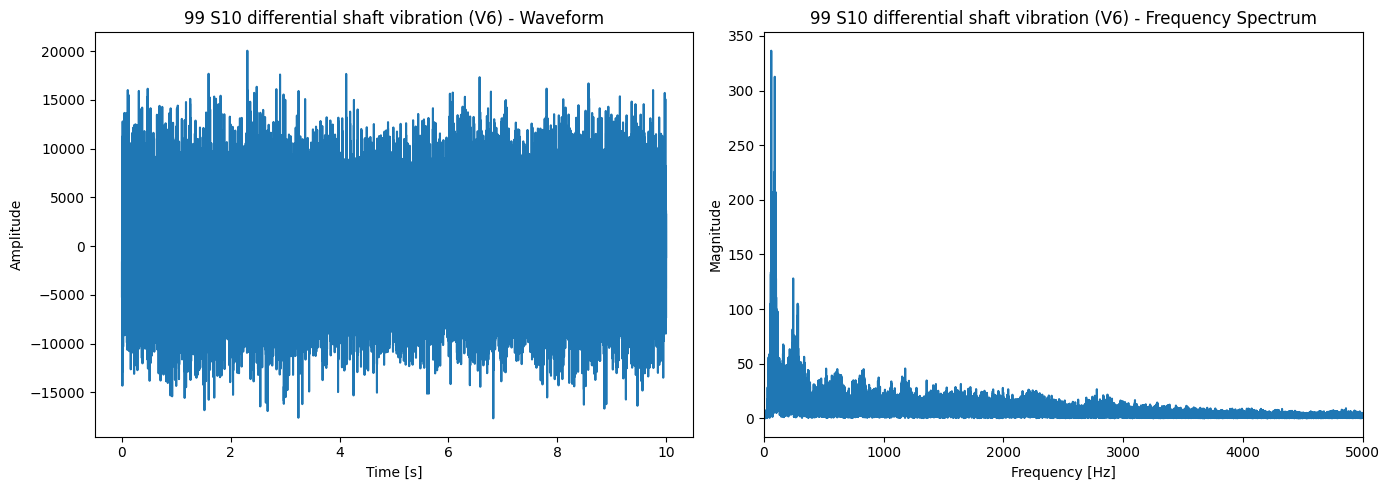

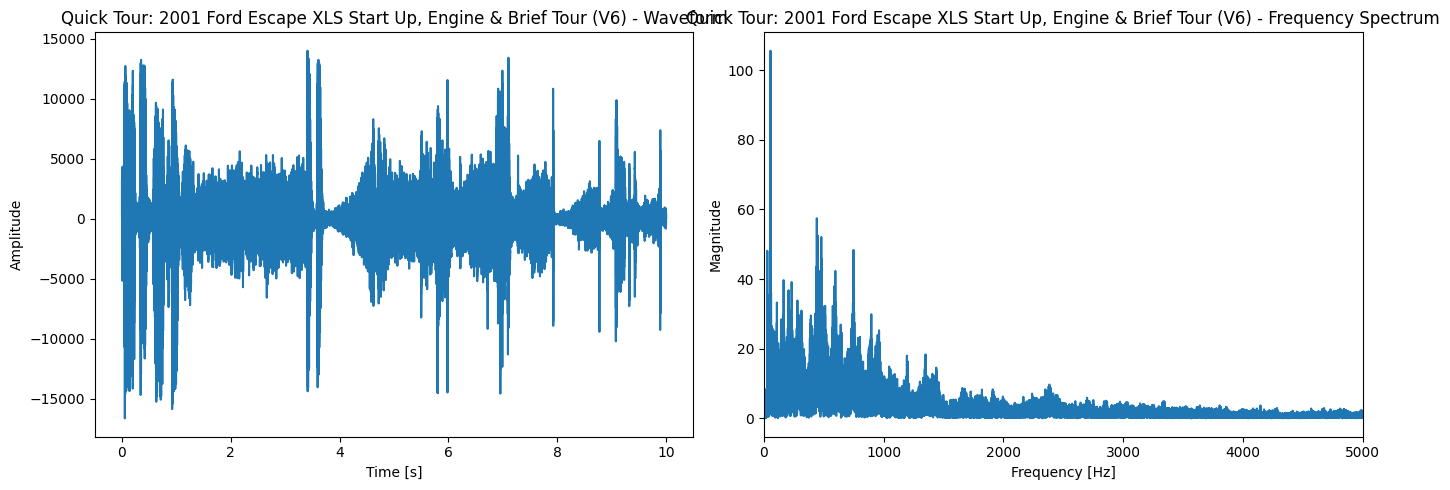

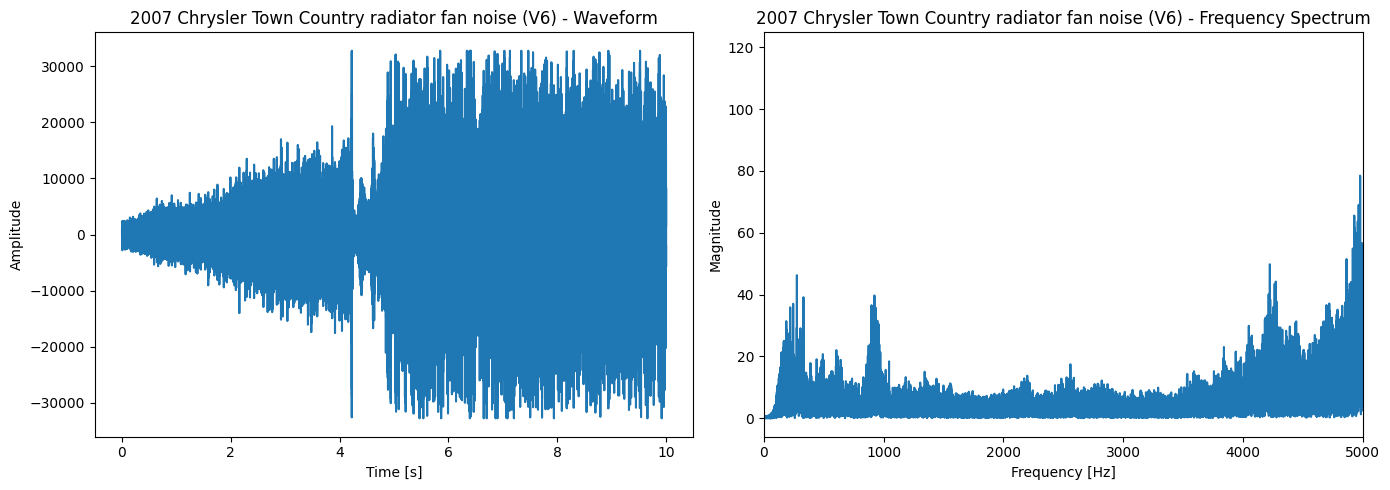

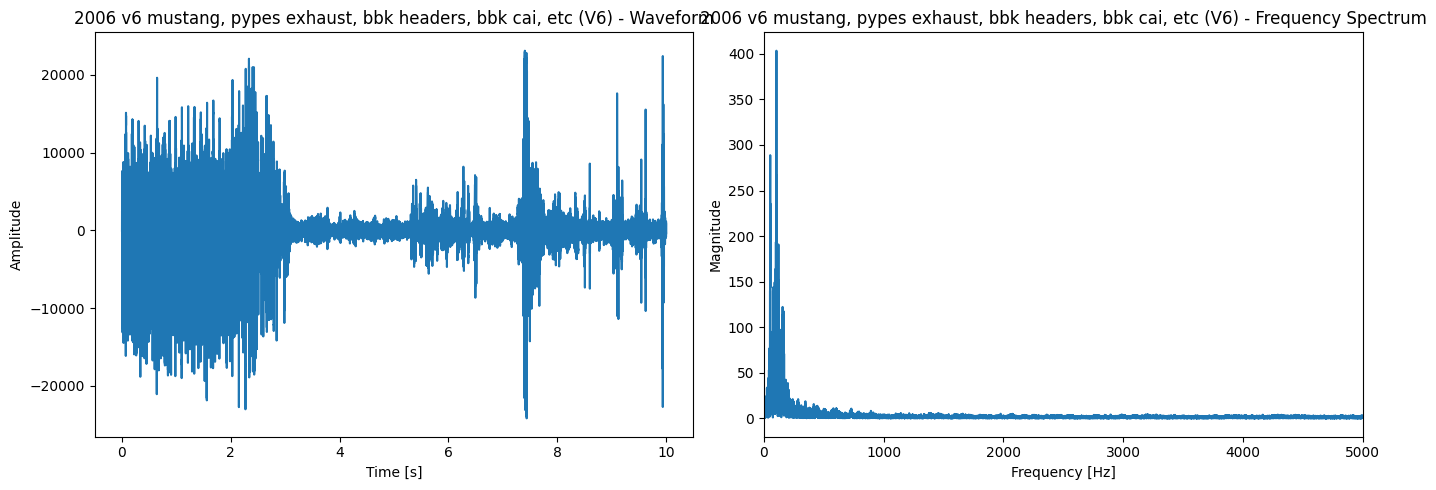

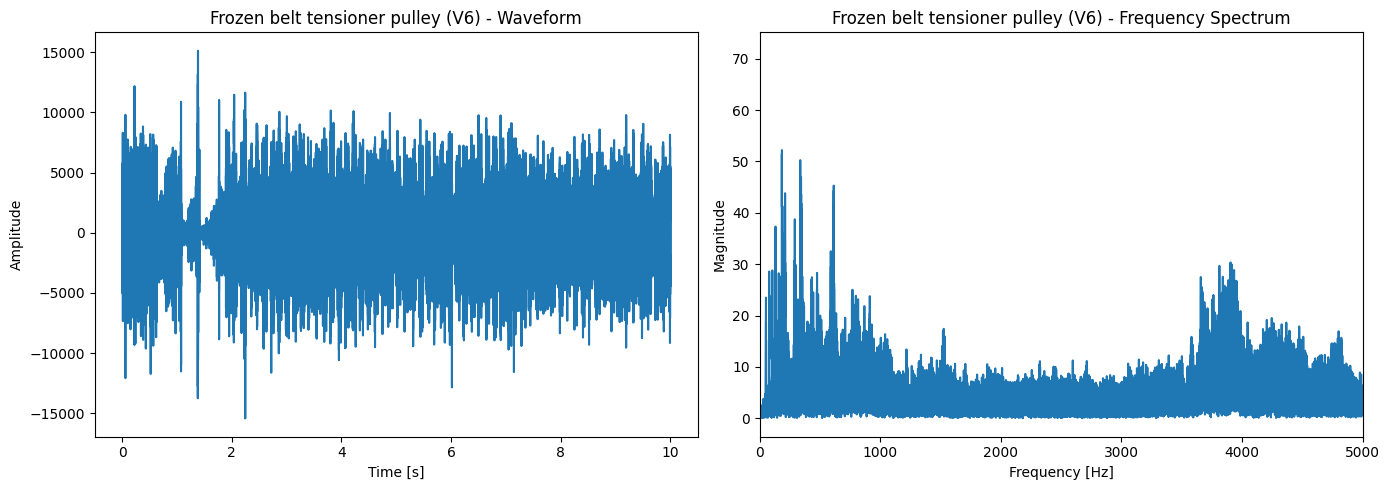

Found 5 engines of type inline-4


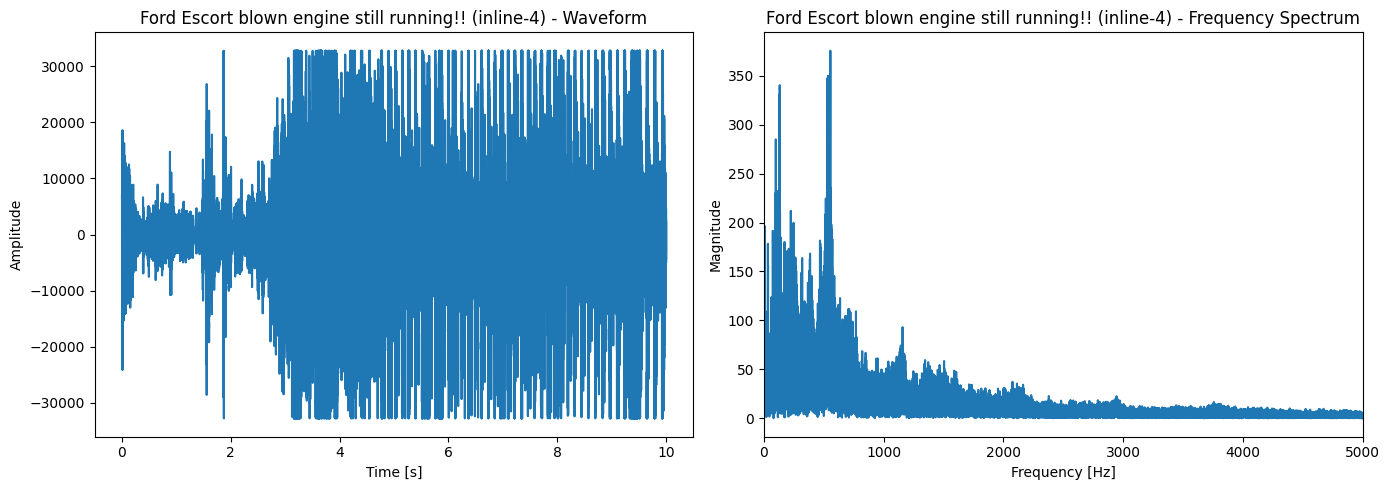

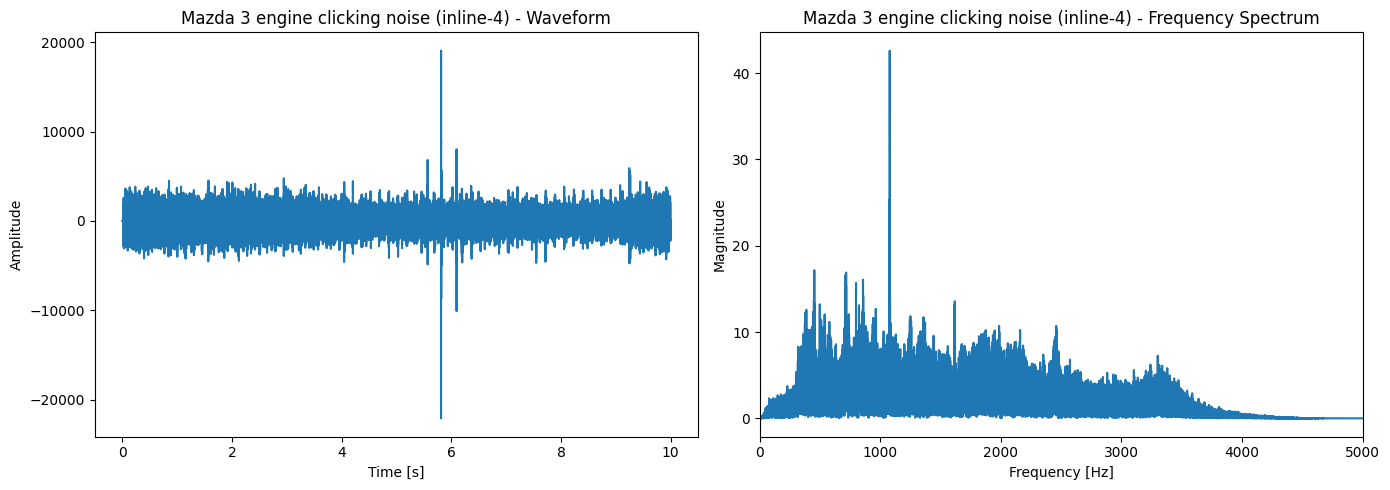

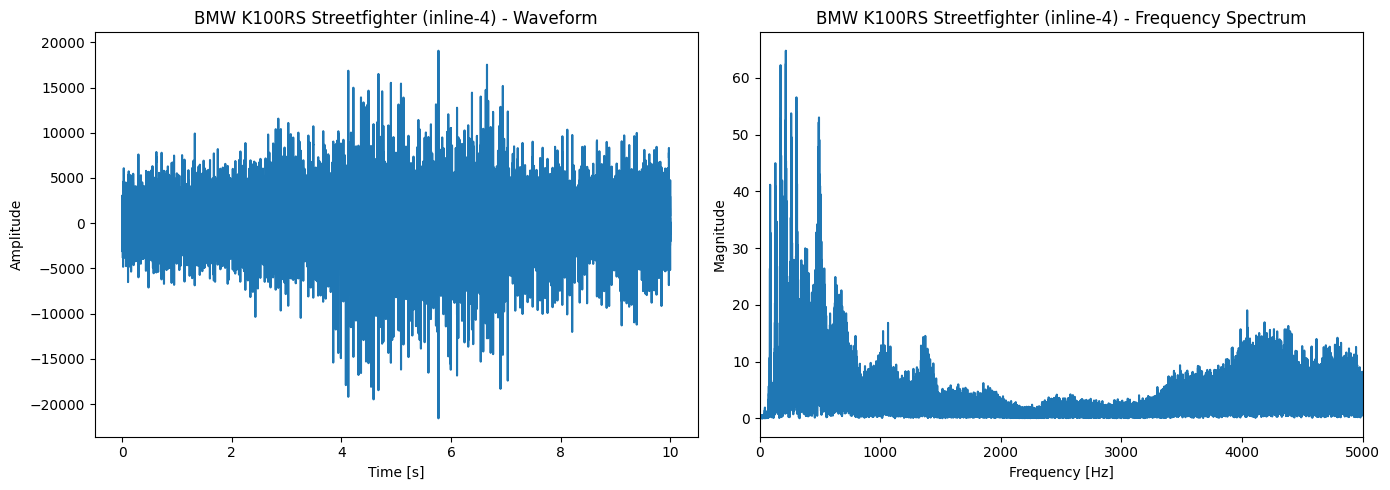

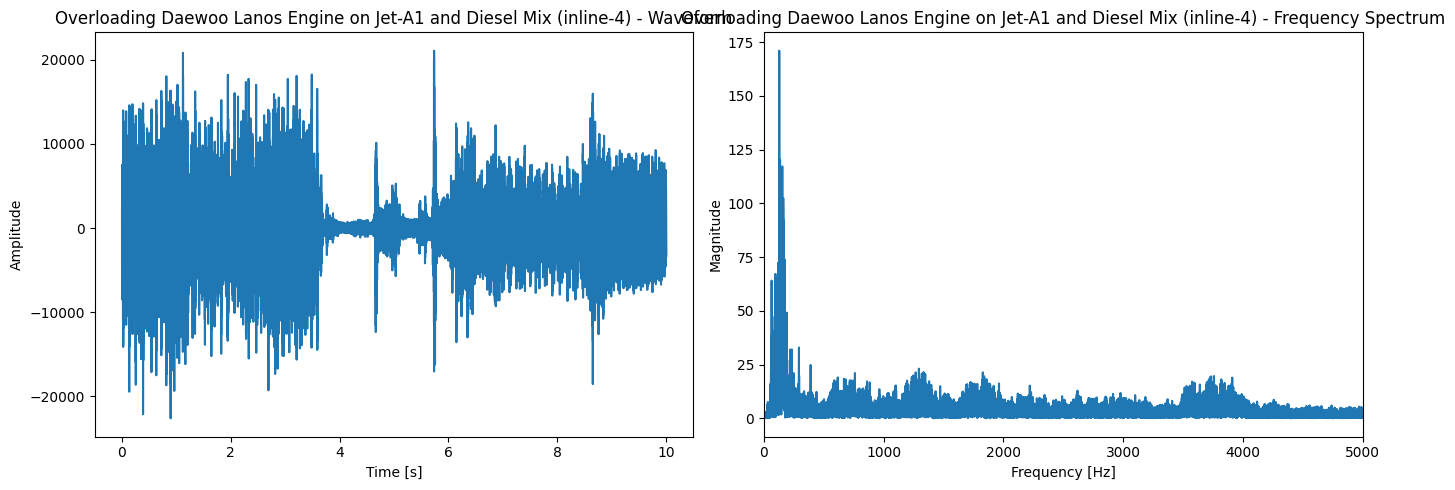

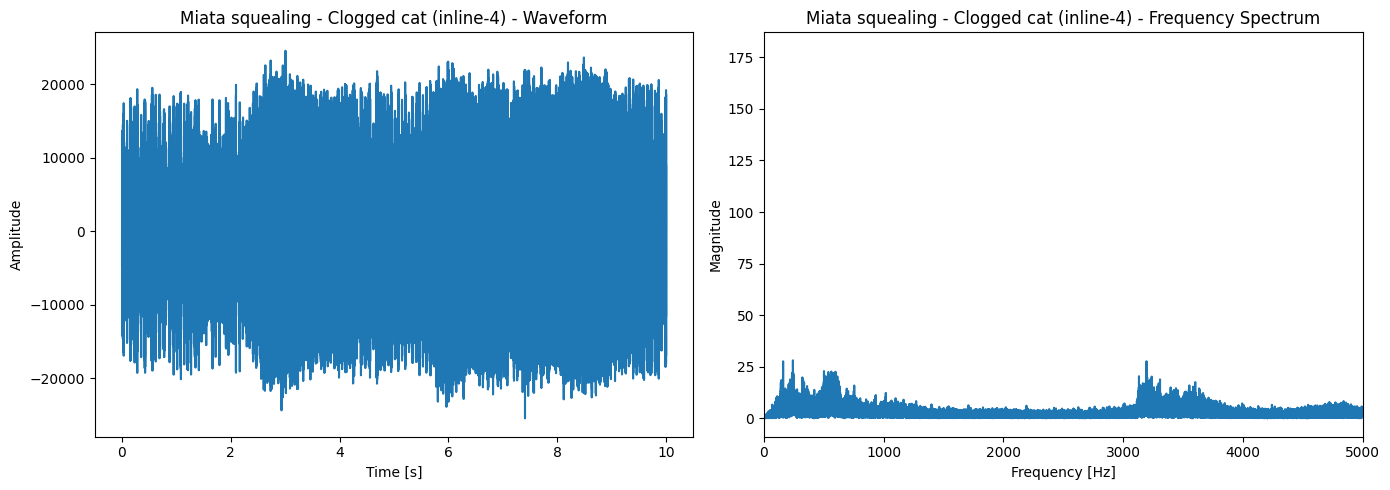

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import os

def plot_engines_by_type(engine_type):
    filtered_meta = metadata[metadata['engine_type'] == engine_type]
    
    print(f"Found {len(filtered_meta)} engines of type {engine_type}")
    
    for _, row in filtered_meta.iterrows():
        filename = row['filename']
        title = row['title']
        file_path = os.path.join(wav_folder, filename)
        
        # --- Load WAV ---
        sample_rate, data = wavfile.read(file_path)
        if len(data.shape) > 1:
            data = data[:, 0]  # take first channel if stereo
        
        time = np.arange(len(data)) / sample_rate
        
        # --- FFT ---
        n = len(data)
        fft_vals = np.fft.fft(data)
        fft_freqs = np.fft.fftfreq(n, 1/sample_rate)
        
        positive_freqs = fft_freqs[:n//2]
        positive_vals = np.abs(fft_vals[:n//2]) / n  # normalized
        
        # --- Plot ---
        plt.figure(figsize=(14, 5))
        
        # Waveform
        plt.subplot(1, 2, 1)
        plt.plot(time, data)
        plt.title(f"{title} ({engine_type}) - Waveform")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        
        # FFT Spectrum
        plt.subplot(1, 2, 2)
        plt.plot(positive_freqs, positive_vals)
        plt.title(f"{title} ({engine_type}) - Frequency Spectrum")
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Magnitude")
        plt.xlim(0, 5000)  # adjust depending on engine frequencies
        
        plt.tight_layout()
        plt.show()

# --- Plot V6 engines ---
plot_engines_by_type("V6")

# --- Plot V8 engines ---
plot_engines_by_type("inline-4")


/var/folders/nm/b_657b8s0_n7nkw6gl0z9shw0000gq/T/ipykernel_72852/2843521013.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("hsv", len(unique_labels))
/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31569 (\N{CJK UNIFIED IDEOGRAPH-7B51}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from font(s) DejaVu Sans.
  fig.c

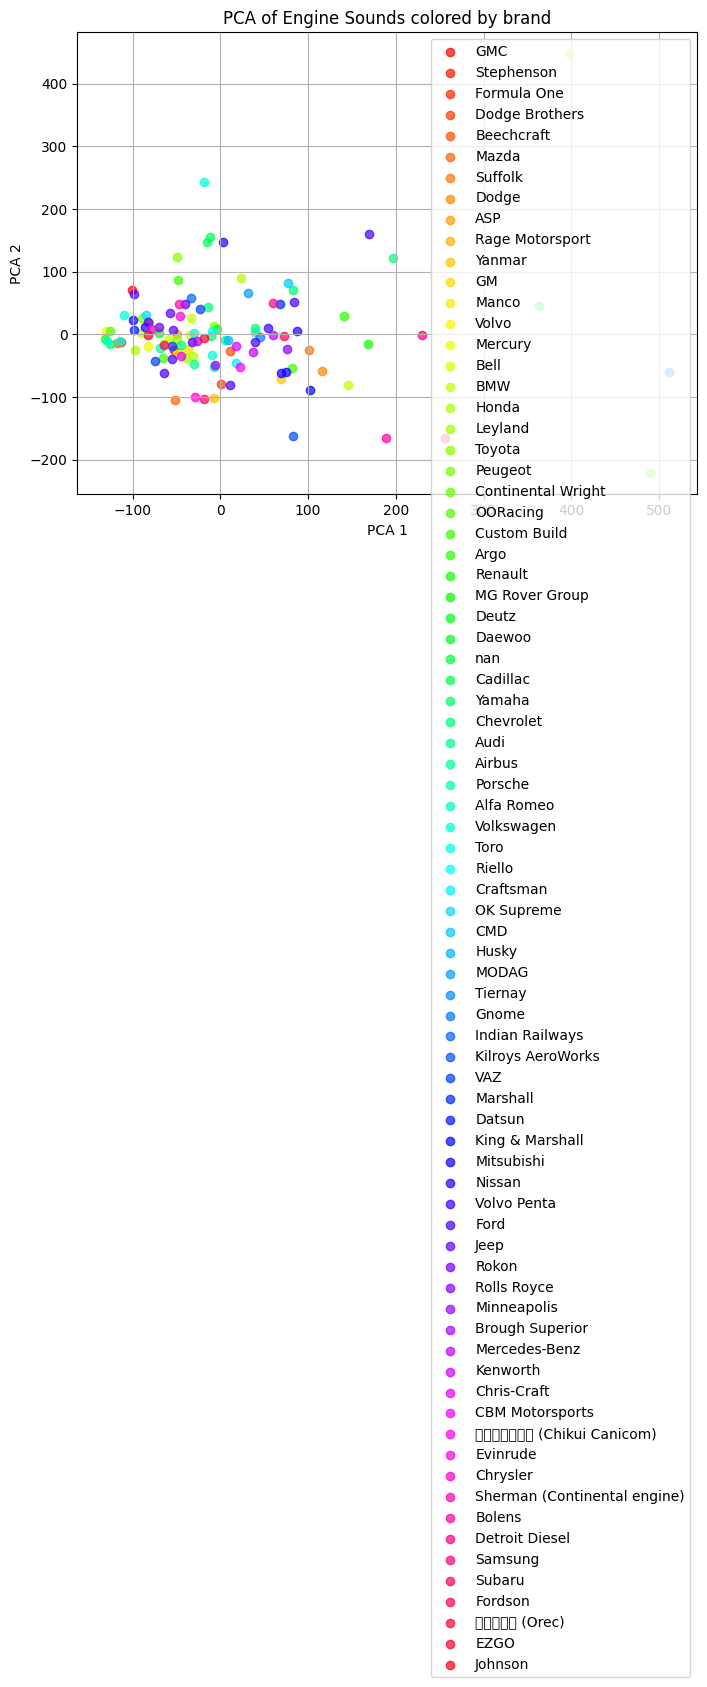

In [33]:
import numpy as np
import pandas as pd
import os
from scipy.io import wavfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.signal import resample

# --- Feature extraction ---
fft_features = []
labels = []

n_bins = 1000  # fixed FFT feature size

for _, row in metadata.iterrows():
    filename = row['filename']
    file_path = os.path.join(wav_folder, filename)
    
    try:
        sample_rate, data = wavfile.read(file_path)
        if len(data.shape) > 1:
            data = data[:, 0]  # take first channel if stereo
        
        # Compute FFT magnitude
        n = len(data)
        fft_vals = np.fft.fft(data)
        fft_mag = np.abs(fft_vals[:n//2]) / n  # normalized magnitude
        
        # Resample FFT to fixed length
        fft_mag_resampled = resample(fft_mag, n_bins)
        
        fft_features.append(fft_mag_resampled)
        labels.append(row)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

fft_features = np.array(fft_features)

# --- PCA to 2D ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fft_features)

# --- Visualization ---
def plot_pca(column_name):
    plt.figure(figsize=(8, 6))
    
    # Get labels for coloring
    label_vals = [row[column_name] for row in labels]
    unique_labels = list(set(label_vals))
    colors = plt.cm.get_cmap("hsv", len(unique_labels))
    # colors = plt.cm.get_cmap("tab10", len(unique_labels))
    
    for i, ul in enumerate(unique_labels):
        inds = [j for j, l in enumerate(label_vals) if l == ul]
        plt.scatter(pca_result[inds, 0], pca_result[inds, 1], 
                    color=colors(i), label=str(ul), alpha=0.7)
    
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"PCA of Engine Sounds colored by {column_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Example usage ---
plot_pca("brand")


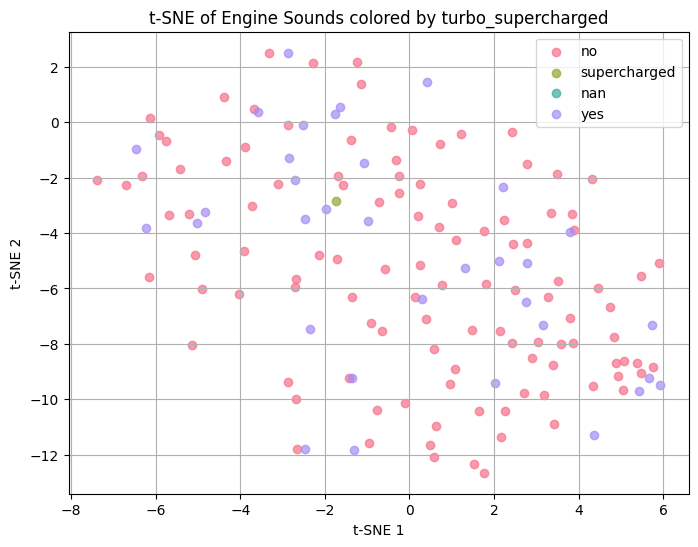

In [37]:
import numpy as np
import pandas as pd
import os
from scipy.io import wavfile
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.signal import resample
import seaborn as sns

# --- Feature extraction ---
fft_features = []
labels = []

n_bins = 1000  # fixed FFT feature size

for _, row in metadata.iterrows():
    filename = row['filename']
    file_path = os.path.join(wav_folder, filename)
    
    try:
        sample_rate, data = wavfile.read(file_path)
        if len(data.shape) > 1:
            data = data[:, 0]  # take first channel if stereo
        
        # Compute FFT magnitude
        n = len(data)
        fft_vals = np.fft.fft(data)
        fft_mag = np.abs(fft_vals[:n//2]) / n  # normalized magnitude
        
        # Resample FFT to fixed length
        fft_mag_resampled = resample(fft_mag, n_bins)
        
        fft_features.append(fft_mag_resampled)
        labels.append(row)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

fft_features = np.array(fft_features)

# --- t-SNE to 2D ---
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(fft_features)


def plot_tsne(column_name):
    plt.figure(figsize=(8, 6))
    
    # Get labels for coloring
    label_vals = [row[column_name] for row in labels]
    unique_labels = list(set(label_vals))
    
    # Use seaborn palette
    palette = sns.color_palette("husl", len(unique_labels))
    color_map = dict(zip(unique_labels, palette))
    
    for ul in unique_labels:
        inds = [j for j, l in enumerate(label_vals) if l == ul]
        plt.scatter(tsne_result[inds, 0], tsne_result[inds, 1], 
                    color=color_map[ul], label=str(ul), alpha=0.7)
    
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title(f"t-SNE of Engine Sounds colored by {column_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


# --- Example usage ---
plot_tsne("turbo_supercharged")


Feature shape: (151, 132)
Explained variance (PCA): 0.8564175857467278


/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Clusters found (including noise -1): (array([-1]), array([151]))
Silhouette (on non-noise): None
Davies-Bouldin (on non-noise): None


/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/math-project/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


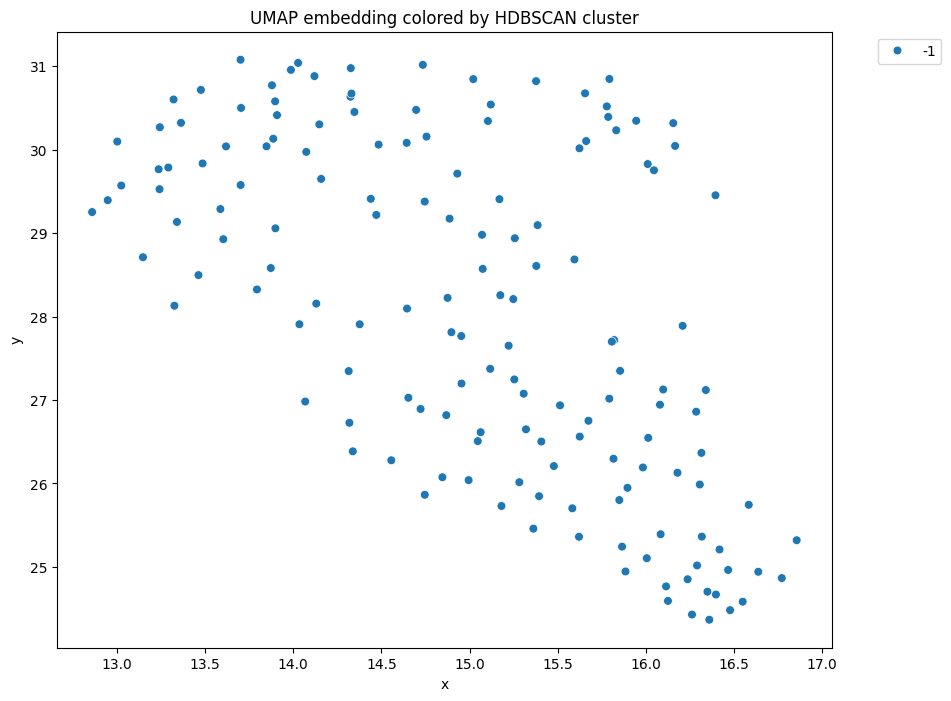

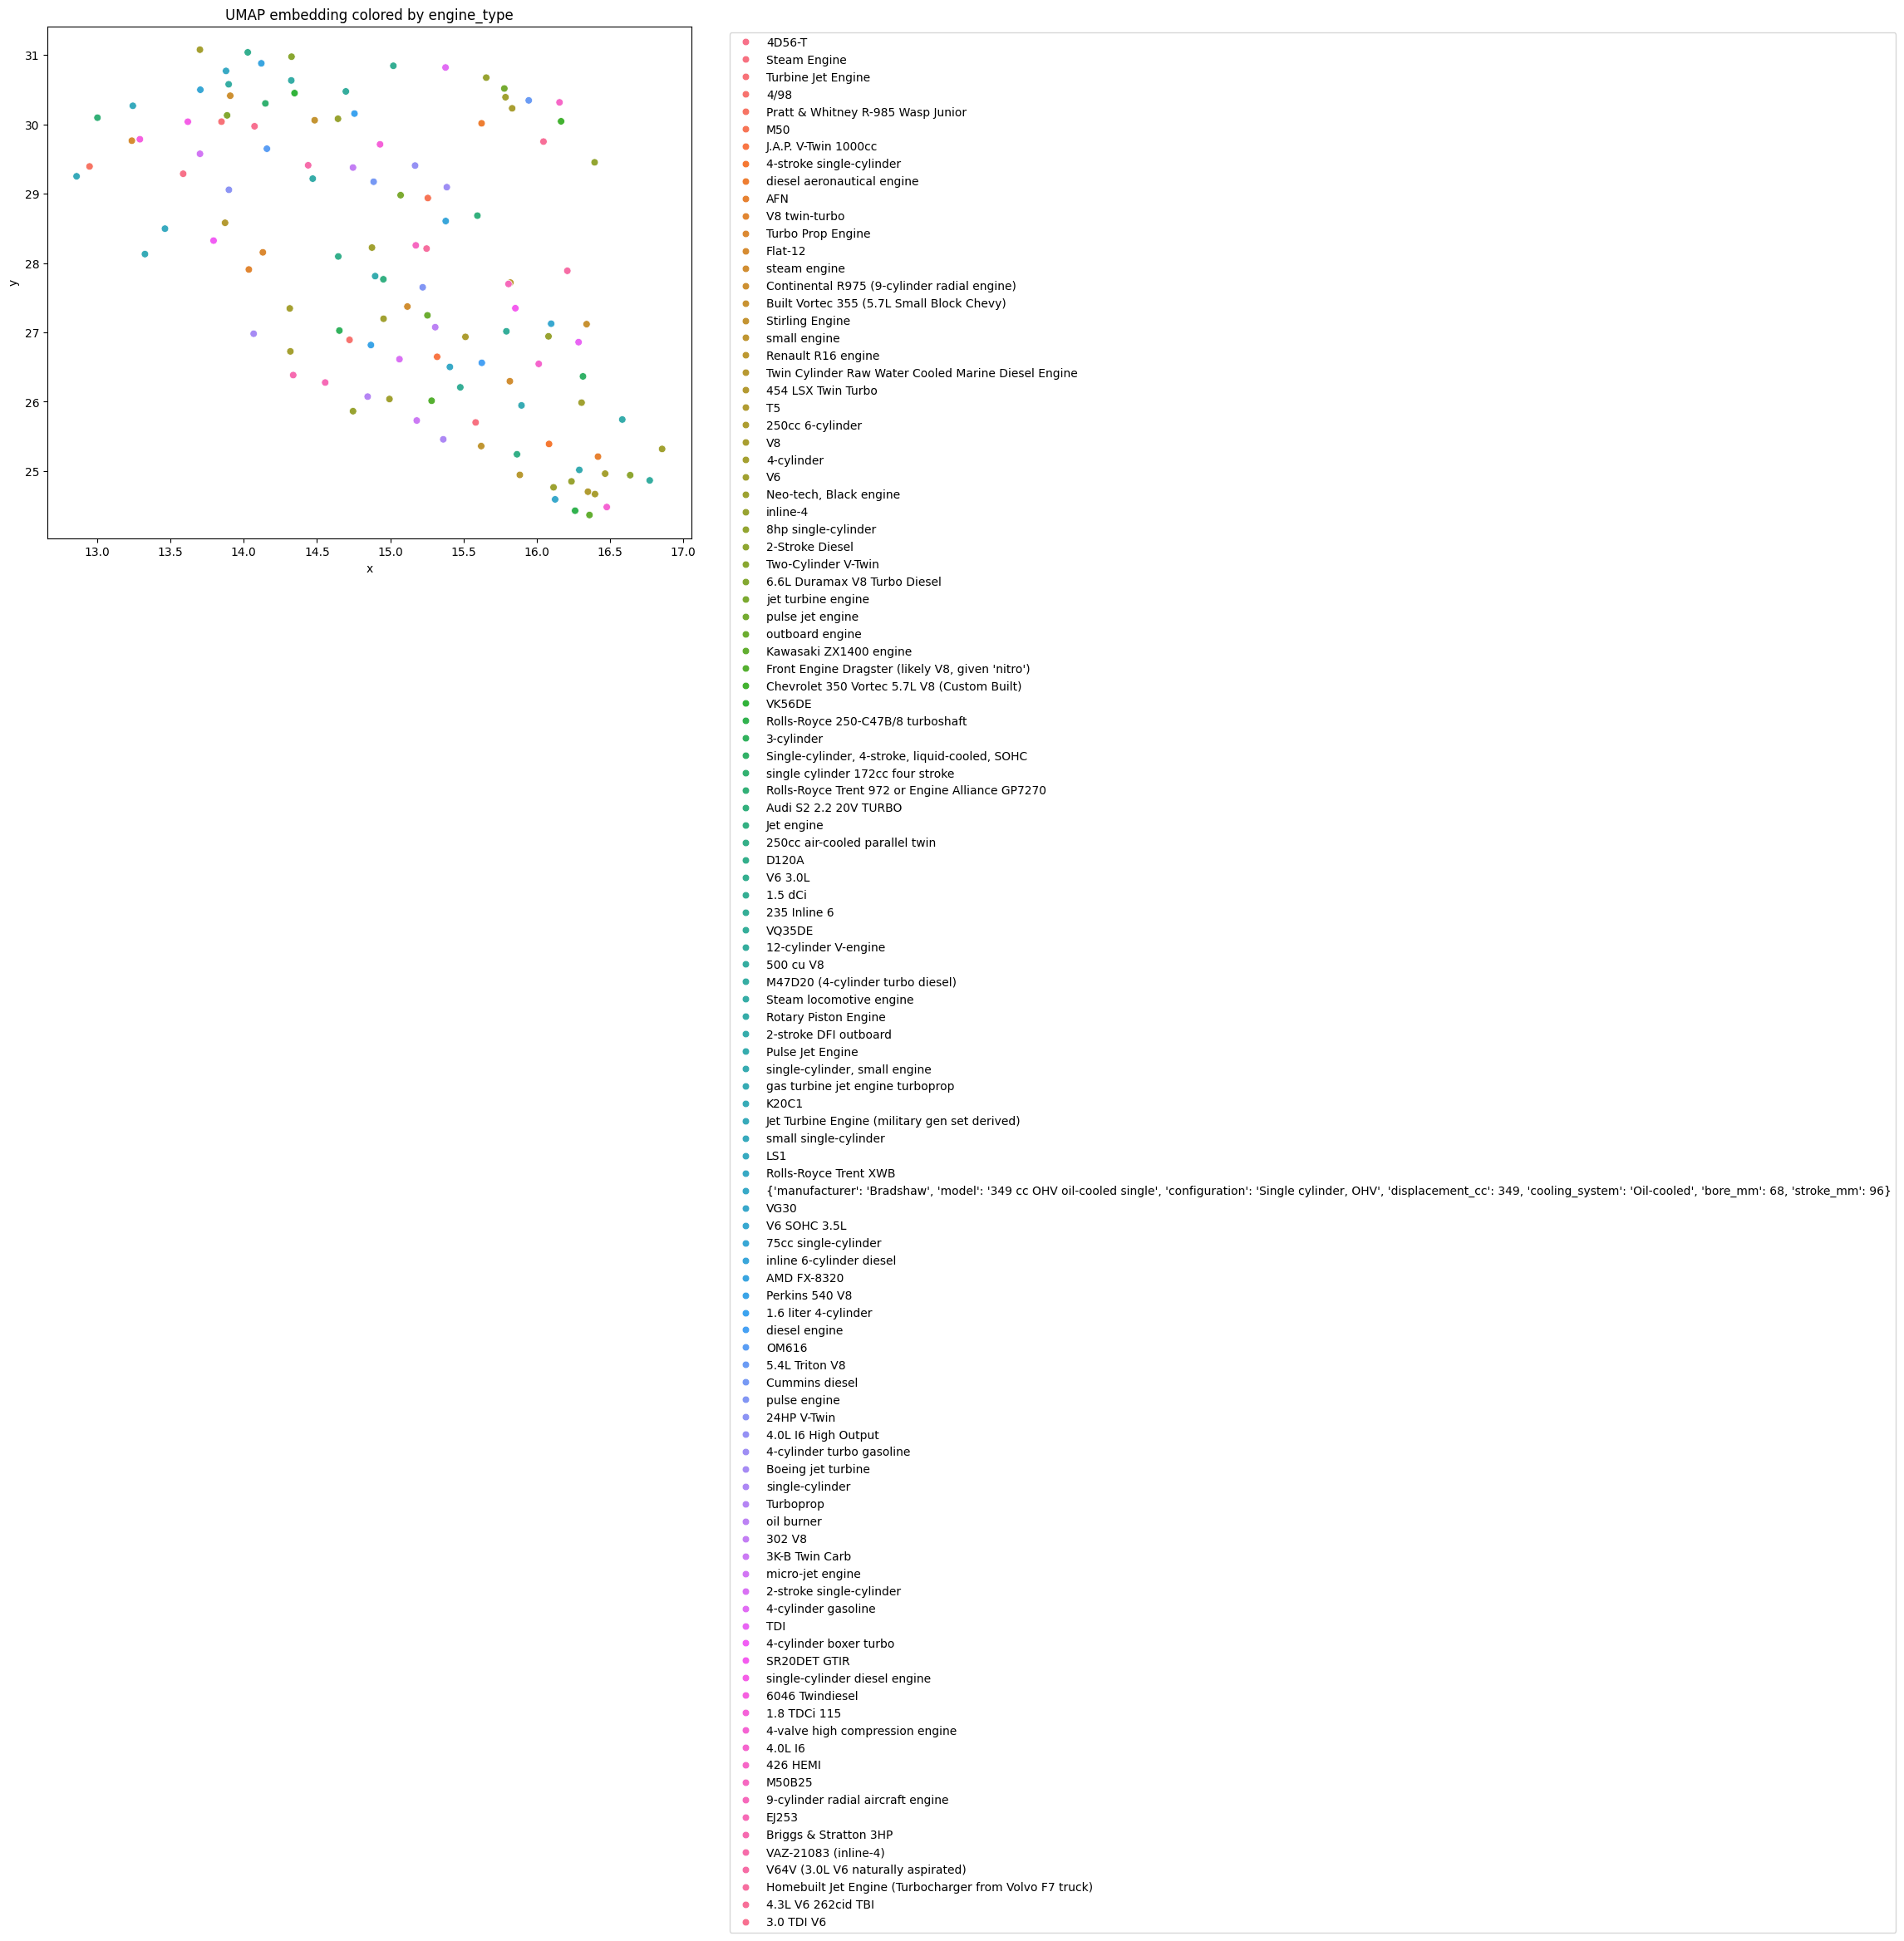

In [47]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


# Parameters
SR = 16000
N_MFCC = 20
PCA_DIMS = 30   # set lower if dataset is small
UMAP_N_NEIGHBORS = 15
UMAP_MIN_DIST = 0.1
RANDOM_STATE = 42

def extract_features(file_path, sr=SR, n_mfcc=N_MFCC):
    # load, resample, trim silence
    y, sr = librosa.load(file_path, sr=sr, mono=True)
    # trim leading/trailing silence (tunable)
    y, _ = librosa.effects.trim(y, top_db=30)
    if len(y) < 1024:
        # pad very short clips
        y = np.pad(y, (0, max(0, 1024 - len(y))), 'constant')
    # MFCC + deltas
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    # spectral features
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rms = librosa.feature.rms(y=y)
    # harmonic / percussive
    y_harm, y_perc = librosa.effects.hpss(y)
    # collect stats: mean & std (you can add skew/kurt)
    def stat_feat(arr):
        return np.hstack([arr.mean(axis=1), arr.std(axis=1)])
    feats = []
    feats.append(stat_feat(mfcc))         # 2*n_mfcc
    feats.append(stat_feat(mfcc_delta))
    feats.append(stat_feat(mfcc_delta2))
    feats.append(stat_feat(spec_cent))
    feats.append(stat_feat(spec_bw))
    feats.append(stat_feat(rolloff))
    feats.append(stat_feat(zcr))
    feats.append(stat_feat(rms))
    # optional: harmonic/percussive energy ratio
    harm_rms = librosa.feature.rms(y=y_harm).mean()
    perc_rms = librosa.feature.rms(y=y_perc).mean()
    feats.append(np.array([harm_rms, perc_rms]))
    # flatten into 1d vector
    feature_vector = np.hstack(feats)
    return feature_vector

# build dataset
X = []
rows = []
for idx, row in metadata.iterrows():
    fname = row['filename']
    path = os.path.join(wav_folder, fname)
    try:
        fv = extract_features(path)
        X.append(fv)
        rows.append(row)
    except Exception as e:
        print(f"skip {fname}: {e}")

X = np.vstack(X)
print("Feature shape:", X.shape)

# Preprocessing: scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: PCA for denoising / speed
if PCA_DIMS and PCA_DIMS < X_scaled.shape[1]:
    pca = PCA(n_components=PCA_DIMS, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_scaled)
    print("Explained variance (PCA):", pca.explained_variance_ratio_.sum())
else:
    X_pca = X_scaled

# UMAP embedding
reducer = umap.UMAP(n_neighbors=UMAP_N_NEIGHBORS, min_dist=UMAP_MIN_DIST,
                    n_components=2, random_state=RANDOM_STATE)
embed = reducer.fit_transform(X_pca)

# Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
cluster_labels = clusterer.fit_predict(X_pca)

# Evaluation metrics (only for clusters >1)
valid_mask = cluster_labels != -1
if len(np.unique(cluster_labels[valid_mask])) > 1 and valid_mask.sum() > 1:
    sil = silhouette_score(X_pca[valid_mask], cluster_labels[valid_mask])
    db = davies_bouldin_score(X_pca[valid_mask], cluster_labels[valid_mask])
else:
    sil = None
    db = None

print("Clusters found (including noise -1):", np.unique(cluster_labels, return_counts=True))
print("Silhouette (on non-noise):", sil)
print("Davies-Bouldin (on non-noise):", db)

# Visualization
df_plot = pd.DataFrame({
    "x": embed[:, 0],
    "y": embed[:, 1],
    "cluster": cluster_labels,
})
# optionally add metadata column(s) to df_plot
df_plot["engine_type"] = [r["engine_type"] for r in rows]
df_plot["title"] = [r["title"] for r in rows]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x="x", y="y", hue="cluster", palette="tab20", s=40, legend="full")
plt.title("UMAP embedding colored by HDBSCAN cluster")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# If you want to color by metadata instead:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x="x", y="y", hue="engine_type", palette="husl", s=40, legend="full")
plt.title("UMAP embedding colored by engine_type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
